# Arbre binaire de recherche (ABR)

## Définition d'un ABR

Un **arbre binaire de recherche** est un arbre binaire tel que pour un noeud fixé de l'arbre, tout noeud de son arbre fils gauche lui est **strictement inférieur** et tout noeud de son arbre fils droit lui est **strictement supérieur**.

De plus, les valeurs sont distinctes, l'arbre ne possède aucun doublon.

Ainsi construit, un ABR est un ensemble ordonné de données. Les noeuds sont parfois appelés **clés** d'un ABR.

Un même ensemble de données peut être représenté par différents arbres binaires de recherche. Certains ABR auront une structure proche d'un arbre binaire complet ou bien tassé. On dit que ces ABR sont équilibrés.

### Exemple

L'arbre binaire ci-dessous est un arbre binaire de recherche (ABR).

- La racine de l'arbre a pour valeur $5$;
- L'arbre fils gauche a pour valeurs $2$, $3$ et $4$ inférieures à $5$;
- L'arbre fils droit a pour valeurs $6$, $8$ et $9$ supérieurs à $5$.

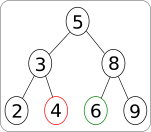

**On remarque:**

- Le noeud de valeur $4$ se situe dans l'arbre fils gauche du noeud de valeur $5$ car $4<5$;     
    Il est dans l'arbre fils droit du noeud de valeur $3$ car $4>3$.

- Le noeud de valeur $6$ se situe dans l'arbre fils droit de la racine de valeur $5$ car $6>5$;     
    Il est dans un arbre fils gauche du noeud de valeur $8$ car $6<8$.
    
- L'arbre binaire est équilibré. D'autres ABR peuvent être construits avec les mêmes données comme le montre la figure ci-dessous.

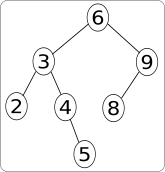

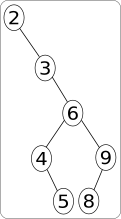

## Implémentation en Python

L'implémentation d'un arbre binaire peut se faire avec des listes, dictionnaires ou par programmation objet.

Le choix de la programmation objet pour implémenter nos ABR reprend celle mise en place pour les arbres binaires. 

- La classe **Noeud** instancie un objet Noeud avec 3 attributs: valeur, gauche, droit;
- La classe **Arbre** instancie un objet Arbre avec un seul attribut racine. La racine est un objet Noeud éventuellement vide.

Le code python de cette implémentation est le suivant:

```python
class Noeud:
    
    def __init__(self, valeur, gauche=None, droit=None):
        # instancie, crée un objet Noeud avec ces trois attributs
        self.valeur = valeur
        self.gauche = gauche
        self.droit = droit
    
    def __str__(self):
        # crée une chaine de caratères pour afficher un objet Noeud avec la commande print
        if self.valeur is None:
            return ""
        else:
            return "Noeud("+str(self.valeur) + ","+ str(self.gauche) +","+ str(self.droit)+")"
    
class Arbre:
    
    def __init__(self,racine=None):
        # instancie, crée un objet Arbre avec un seul attribut dont la valeur est un objet Noeud.
        if isinstance(racine,Noeud):
            self.racine = racine
        else:
            self.racine = Noeud(racine)
        
    def __str__(self):
        # appelle la méthode de l'objet Noeud pour être affiché
        return str(self.racine)
        
    def est_vide(self):
        # teste si l'arbre est vide
        return self.racine.valeur is None
    
    def fils_gauche(self):
        # renvoie le contenu d'un noeud fils gauche en arbre
        return Arbre(self.racine.gauche)
        
    def fils_droit(self):
        # renvoie le contenu d'un noeud fils droit en arbre
        return Arbre(self.racine.droit)

```

### Exemple

On se propose de créer l'arbre binaire de recherche, équilibré, de la première figure.

```python
# On crée les feuilles de l'ABR:
n_2 = Noeud(2)
n_4 = Noeud(4)
n_6 = Noeud(6)
n_9 = Noeud(9)
# On crée l'arbre gauche qui a pour valeur un noeud; la racine a pour valeur 3:
n_g = Noeud(3,n_2,n_4)
# On crée l'arbre droit qui a pour valeur un noeud; la racine a pour valeur 8:
n_d = Noeud(8,n_6,n_9)
# On crée le noeud qui contient tous les autres:
n = Noeud(5,n_g,n_d)
# On crée notre objet Arbre:
a= Arbre(n)
print(a)
```
On obtient l'affichage : Noeud(5,Noeud(3,Noeud(2,None,None),Noeud(4,None,None)),Noeud(8,Noeud(6,None,None),Noeud(9,None,None)))

## Recherche d'une clé dans un ABR

Un arbre binaire de recherche est soit vide, soit constitué d'un noeud racine et de 2 arbres binaires de recherche gauche et droit.

La recherche d'une clé (valeur) dans un ABR s'appuie sur le parcours récursif de l'arbre. 

On en donne l'algorithme ci-dessous:

```
si arbre vide:
    valeur x non présente
sinon:
    si x < valeur du Noeud visité:
        on recherche la valeur x dans l'arbre gauche
    sinon si x > valeur Noeud visité:
        on recherche la valeur x dans l'arbre droit
    sinon:
        valeur x trouvée
```

Avec l'implémentation en python des ABR, cet algorithme s'écrit avec une fonction récursive:

```python
def recherche(x,a):
    if a.est_vide():
        return False
    else:
        if x < a.racine.valeur:
            return recherche(x,a.fils_gauche())
        elif x > a.racine.valeur:
            return recherche(x,a.fils_droit())
        else:
            return True
```

## Ajouter une clé dans un ABR


On donne ci-après le processus pour ajouter une clé (valeur) dans un ABR:

- Si l'arbre est vide, on crée un Noeud avec la valeur à ajouter et on l'affecte à la racine de l'arbre;
- Sinon, on parcourt récursivement l'arbre jusqu'à la bonne position et on ajoute un Noeud avec la valeur donnée.

En suivant le processus, l'algorithme s'écrit:

```
si arbre a est vide:
    a.racine = Noeud(x)
sinon:
    si x < valeur du noeud visité:
        si le noeud gauche vide:
            noeud gauche = Noeud(x)
        sinon:
            on ajoute x dans arbre gauche
    si x > valeur noeud visité:
        si le noeud droit vide:
            noeud droit = Noeud(x)
        sinon:
            on ajoute x dans arbre droit
    renvoi de arbre a
```

Avec l'implémentation en POO de notre ABR:

```python
def ajoute(x,a):
    if a.est_vide():
        a.racine = Noeud(x)
    else:
        if x < a.racine.valeur:
            if a.racine.gauche is None:
                a.racine.gauche = Noeud(x)
            else:
                ajoute(x,a.fils_gauche())
        if x > a.racine.valeur:
            if a.racine.droit is None:
                a.racine.droit = Noeud(x)
            else:
                ajoute(x,a.fils_droit())
    return a
```

Cette fonction insère des valeurs dans un ABR, y compris lorsque celui-ci est vide. En conséquence, cette fonction permet de créer des ABR et de les compléter facilement sans avoir à créer chaque Noeud.

### Exemple

On crée un ABR avec la fonction ajoute:

```python
a2 = Arbre()
print("a2 est un arbre vide:",a2.racine)
a2 = ajoute(3,a2)
print("a2 possède un noeud de valeur 3:",a2)
a2 = ajoute(2,a2)
print(a2)
a2 = ajoute(5,a2)
print(a2)
a2 = ajoute(1,a2)
print(a2)
a2 = ajoute(7,a2)
print(a)
a2 = ajoute(6,a2)
print(a2)
a2 = ajoute(8,a2)
print(a2)
```

Les affichages successifs sont:

```
a2 est un arbre vide: 
a2 possède un noeud de valeur 3: Noeud(3,None,None)
Noeud(3,Noeud(2,None,None),None)
Noeud(3,Noeud(2,None,None),Noeud(5,None,None))
Noeud(3,Noeud(2,Noeud(1,None,None),None),Noeud(5,None,None))
Noeud(7,Noeud(5,Noeud(3,Noeud(2,None,None),Noeud(4,None,None)),Noeud(6,None,None)),Noeud(8,None,Noeud(9,None,None)))
Noeud(3,Noeud(2,Noeud(1,None,None),None),Noeud(5,None,Noeud(7,Noeud(6,None,None),None)))
Noeud(3,Noeud(2,Noeud(1,None,None),None),Noeud(5,None,Noeud(7,Noeud(6,None,None),Noeud(8,None,None))))
```

La représentation de cet arbre est la suivante:

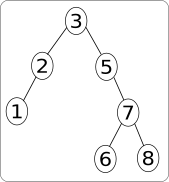